In [86]:
# Yash Singh 
# 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import statsmodels.api as sm

proj_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/scripts/ue_ee_cyclicality"

In [87]:
# Employment and Unemployment Stocks 
stocks = pd.read_csv(f"{proj_dir}/raw_data/employment_v2.csv")

stocks.columns = ['date', 'E', 'U']
stocks = stocks.iloc[11:].reset_index(drop=True)
stocks = stocks.dropna(subset=['date', 'E', 'U'])
stocks['date'] = pd.to_datetime(stocks['date'])
stocks['U'] = stocks['U'].astype(float)
stocks['E'] = stocks['E'].astype(float)



# UE flows in level 
ue = pd.read_csv(f"{proj_dir}/raw_data/NE.csv")
ue.columns = ['date', 'ne_flows', 'ue_flows']
                                 
ue['date'] = pd.to_datetime(ue['date'])

data= stocks.merge(ue, on = ['date'])


# EE flows in rate 
ee = pd.read_csv(f"{proj_dir}/raw_data/ee_fmp.csv") 

ee.rename(columns={"FMPNSA": "ee_pol", 'observation_date': 'date'}, inplace=True)


ee['date'] = pd.to_datetime(ee['date'])

data = ee.merge(data, on=['date'])
data['ee_pol'] = data['ee_pol'] / 100
data['ee_flows'] = data['ee_pol'] * data['E']


#################################
# Ratio 

data['flow_ratio'] = data['ee_flows'] / (data['ue_flows'] + data['ne_flows'] + data['ee_flows'])

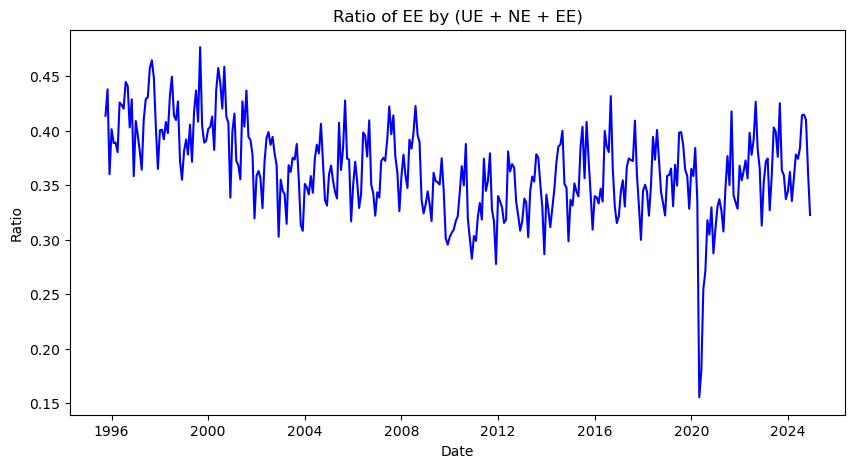

In [88]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(data['date'], data['flow_ratio'], label='Flow Ratio', color='b')

# Formatting
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio of EE by (UE + NE + EE)')
#plt.ylim(0,3)

# Show the plot
plt.show()

C:\Users\singhy\AppData\Local\Temp\ipykernel_1488\99098226.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = data.resample('Q', on='date').mean()


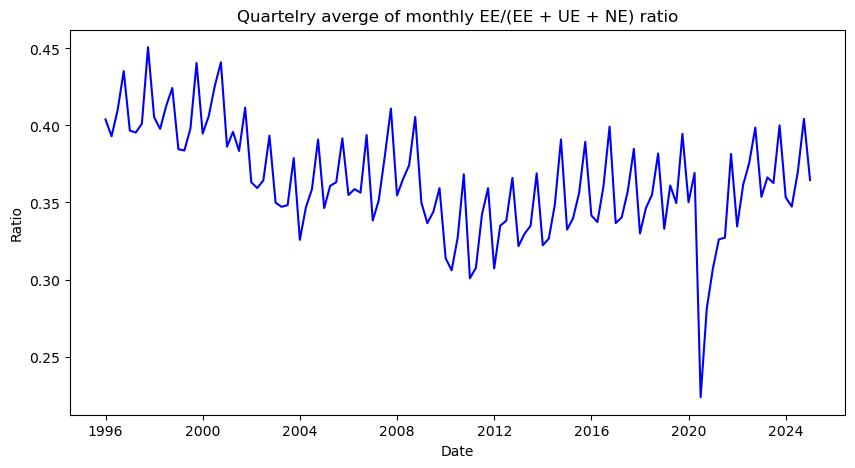

In [89]:
df_quarterly = data.resample('Q', on='date').mean()

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df_quarterly.index, df_quarterly['flow_ratio'], label='Flow Ratio (Quarterly)', color='b')

# Formatting
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Quartelry averge of monthly EE/(EE + UE + NE) ratio')


# Show the plot
plt.show()

In [90]:
# JOLTS data 

jolts = pd.read_csv(f"{proj_dir}/raw_data/jolts_level_v3.csv") 

# JOLTS 
jolts.columns = ['date', 'vacancy_stock', 'tot_quits',  'tot_hires', 'tot_layoffs']

jolts['date'] = pd.to_datetime(jolts['date'])

In [91]:
jolts['flow_ratio'] = jolts['tot_quits'] / jolts['tot_hires']

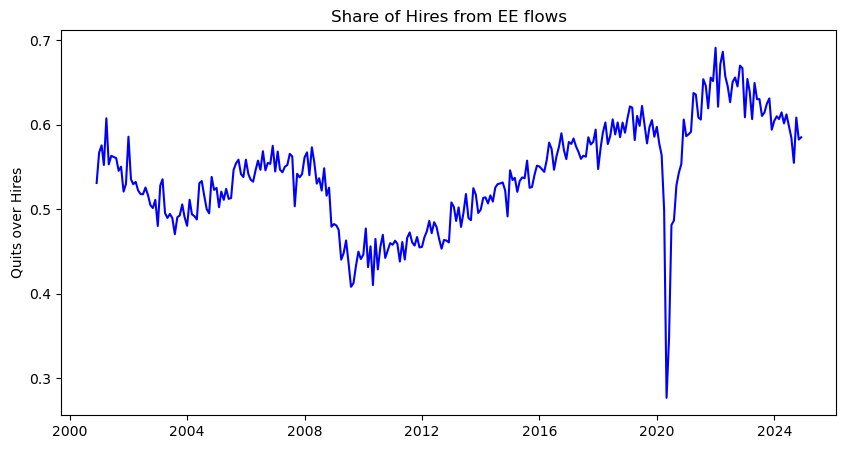

In [92]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(jolts['date'], jolts['flow_ratio'], label='Flow Ratio', color='b')

# Formatting
plt.ylabel('Quits over Hires')
plt.title('Share of Hires from EE flows')

# Show the plot
plt.show()

In [93]:



# Convert date to datetime format
jolts['date'] = pd.to_datetime(jolts['date'])

# Create log columns
jolts['log_hires'] = np.log(jolts['tot_hires'])
jolts['log_quits'] = np.log(jolts['tot_quits'])

# Define the two periods
jolts_pre_2020 = jolts[jolts['date'] < '2020-01-01']
jolts_post_2021 = jolts[(jolts['date'] >= '2021-04-01') & (jolts['date'] <= '2023-05-31')]

# Run regression for first period
X1 = sm.add_constant(jolts_pre_2020['log_hires'])
y1 = jolts_pre_2020['log_quits']
model1 = sm.OLS(y1, X1).fit()

# Run regression for second period
X2 = sm.add_constant(jolts_post_2021['log_hires'])
y2 = jolts_post_2021['log_quits']
model2 = sm.OLS(y2, X2).fit()

# Print results
print("Regression results for period before 2020:")
print(model1.summary())

print("\nRegression results for period April 2021 - May 2023:")
print(model2.summary())


Regression results for period before 2020:
                            OLS Regression Results                            
Dep. Variable:              log_quits   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     3792.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          1.19e-143
Time:                        11:14:45   Log-Likelihood:                 377.70
No. Observations:                 229   AIC:                            -751.4
Df Residuals:                     227   BIC:                            -744.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [95]:
jolts

,date,vacancy_stock,tot_quits,tot_hires,tot_layoffs,flow_ratio,log_hires,log_quits,post_2021,log_hires_x_post
0,2000-12-01,5088,2882,5426,2018,0.531146,8.598957,7.966240,0,0.000000
1,2001-01-01,5234,3245,5722,2220,0.567109,8.652074,8.084871,0,0.000000
2,2001-02-01,5097,3053,5303,1855,0.575712,8.576028,8.023880,0,0.000000
3,2001-03-01,4762,3054,5528,2133,0.552460,8.617581,8.024207,0,0.000000
4,2001-04-01,4615,3163,5204,1883,0.607802,8.557183,8.059276,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
284,2024-08-01,7861,3178,5435,1668,0.584729,8.600615,8.064007,1,8.600615
285,2024-09-01,7372,3098,5582,1802,0.554998,8.627302,8.038512,1,8.627302
286,2024-10-01,7839,3283,5394,1748,0.608639,8.593043,8.096513,1,8.593043
287,2024-11-01,8156,3130,5373,1800,0.582542,8.589142,8.048788,1,8.589142


In [94]:
# Create a dummy variable for the post-2021 period
jolts['post_2021'] = ((jolts['date'] >= '2021-04-01') & (jolts['date'] <= '2024-12-31')).astype(int)

# Interaction term between log_quits and the dummy
jolts['log_hires_x_post'] = jolts['log_hires'] * jolts['post_2021']

# Run the regression: log_hires ~ log_quits + post_2021 + log_quits_x_post
X = jolts[['log_hires', 'log_hires_x_post']]
X = sm.add_constant(X)
y = jolts['log_quits']

model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_quits   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1004.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          4.95e-130
Time:                        11:14:45   Log-Likelihood:                 313.88
No. Observations:                 289   AIC:                            -621.8
Df Residuals:                     286   BIC:                            -610.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.4880      0.356  

In [67]:
# Create a dummy variable for the post-2021 period
jolts['post_2021'] = ((jolts['date'] >= '2021-04-01') & (jolts['date'] <= '2024-12-31')).astype(int)

jolts['log_V'] = jolts['vacancy_stock']

# Interaction term between log_quits and the dummy
jolts['log_V_x_post'] = jolts['log_V'] * jolts['post_2021']

# Run the regression: log_hires ~ log_quits + post_2021 + log_quits_x_post
X = jolts[['log_V', 'log_V_x_post']]
X = sm.add_constant(X)
y = jolts['log_quits']

model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_quits   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     627.9
Date:                Wed, 26 Mar 2025   Prob (F-statistic):          2.35e-105
Time:                        10:43:32   Log-Likelihood:                 256.47
No. Observations:                 289   AIC:                            -506.9
Df Residuals:                     286   BIC:                            -495.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.3193      0.022    336.011   